# Collaboration network

Using the library graph-tool we'll contruct the collaboration network of scientists of computer science from 2014. This is a non-directed bipartite graph connecting authors to the papers they have published. We want to get instead a graph were nodes are authors and an edge between two nodes exists only if they have collaborated in at least **5 different papers** together.

In order to work with a smaller graph (~7 Million nodes is too much for now), let's just take authors with at least 50 published papers.

0. Import graph-tool with `impor graph_tool.all as gt`.
1. Get info about the graph to be used with `gt.collection.ns_info['dblp_author_paper']`.
2. Create a graph `g` with `gt.collection.ns['dblp_author_paper']`.
3. Let's get the two sets of nodes in our bipartite graph with `is_bi, part = gt.is_bipartite(g, partition=True`).
4. Get the degrees in a variable `deg` with `g.degree_property_map('out')`.


In [2]:
import graph_tool.all as gt

In [3]:
gt.collection.ns_info['dblp_author_paper']

{'title': 'DBLP author-paper (2014)',
 'description': 'A bipartite of authors and the papers they wrote, from the DBLP computer science bibliography. This snapshot is from May 2014.[^icon]\n[^icon]: Description obtained from the [ICON](https://icon.colorado.edu) project.',
 'citation': [['M. Ley, "The DBLP computer science bibliography: Evolution, research issues, perspectives." Proc. of the 9th Int. Symposium on String Processing and Information Retrieval (SPIRE), 1-10 (2002)',
   'https://doi.org/10.1007/3-540-45735-6_1']],
 'bibtex': ['@incollection{Ley_2002,\n\tdoi = {10.1007/3-540-45735-6_1},\n\turl = {https://doi.org/10.1007%2F3-540-45735-6_1},\n\tyear = 2002,\n\tpublisher = {Springer Berlin Heidelberg},\n\tpages = {1--10},\n\tauthor = {Michael Ley},\n\ttitle = {The {DBLP} Computer Science Bibliography: Evolution, Research Issues, Perspectives},\n\tbooktitle = {String Processing and Information Retrieval}\n}'],
 'url': 'http://konect.cc/networks/dblp-author',
 'restricted': False

In [4]:
g = gt.collection.ns['dblp_author_paper']

In [7]:
is_bip, part = gt.is_bipartite(g, partition=True)

In [18]:
deg = g.degree_property_map('out')

In [16]:
sum(part.a==1)

1953085

### Filter nodes

Create a new function that takes a node as an argument and returns `True` if the node partition `part[node]` is equal to 0 **and** its degree is greater or equal to 50 with `deg[node] >= 20`. The same function should return `True` everytime `part[node]==1` as well. Call the function `first_filter`.

In [78]:
def first_filter(node):
    if part[node] == 0 and deg[node] >= 20:
        return True
    elif part[node] == 1:
        return True
    return False

Create a new `gt.GraphView` (a subgraph) of `g` in a variable `h` using the function `first_filter` as `h = gt.GraphView(g, vfilt=first_filter)`.

In [79]:
h = gt.GraphView(g, vfilt=first_filter)

Get the degrees of `h` in `deg_h` using `h.degree_property_map('out')`.

In [80]:
deg_h = h.degree_property_map('out')

Filter the graph again to get only the nodes of `h` with a degree greater or equal to 1 with `gt.GraphView(h, vfilt=lambda v: deg_h[v] >= 1)`.

In [81]:
h = gt.GraphView(h, vfilt=lambda v: deg_h[v] >= 1)

Now we only have people with at least 20 articles. Now let's create a new graph `p` with the _projection_ of our bipartite graph `h`. This graph will contain only nodes with `part[node] == 0` and there will be an edge connecting two nodes if they shared a neighbor in the graph `h`.

Understand and use the code bellow to get that graph `p`.

In [83]:
edges = []
for u in h.iter_vertices():
    node_u = p.add_vertex()
    if part[u] == 0:
        for paper in h.get_all_neighbors(u):
            for v in h.get_all_neighbors(paper):
                e = tuple(sorted((u, v)))
                if u != v and e not in edges:
                    edges.append(e)

Convert the list `edges` to a `numpy.array` import numpy as np and using `np.array(edges)`.

In [99]:
import numpy as np
edges = np.array(edges)

Create an empty graph `p` and add edges from `edges` with `p.add_edge_list(edges, hashed=True, hash_type=int)`.

In [106]:
p = gt.Graph(directed=False)
v_index = p.add_edge_list(edges, hashed=True, hash_type=int)

You can draw the graph to see that it has more than one connected component (CC). Filter `p` to get the largest CC with `cc = gt.GraphView(p, gt.label_largest_component(p))`.

In [119]:
cc = gt.GraphView(p, vfilt=gt.label_largest_component(p))

Now draw `cc` according to core number. First set `kcore` to be equal to `gt.kcore_decomposition(p)`. Then use `gt.graph_draw(cc, vertex_fill_color=kcore, vertex_size=kcore)`.

In [122]:
kcore = gt.kcore_decomposition(p)

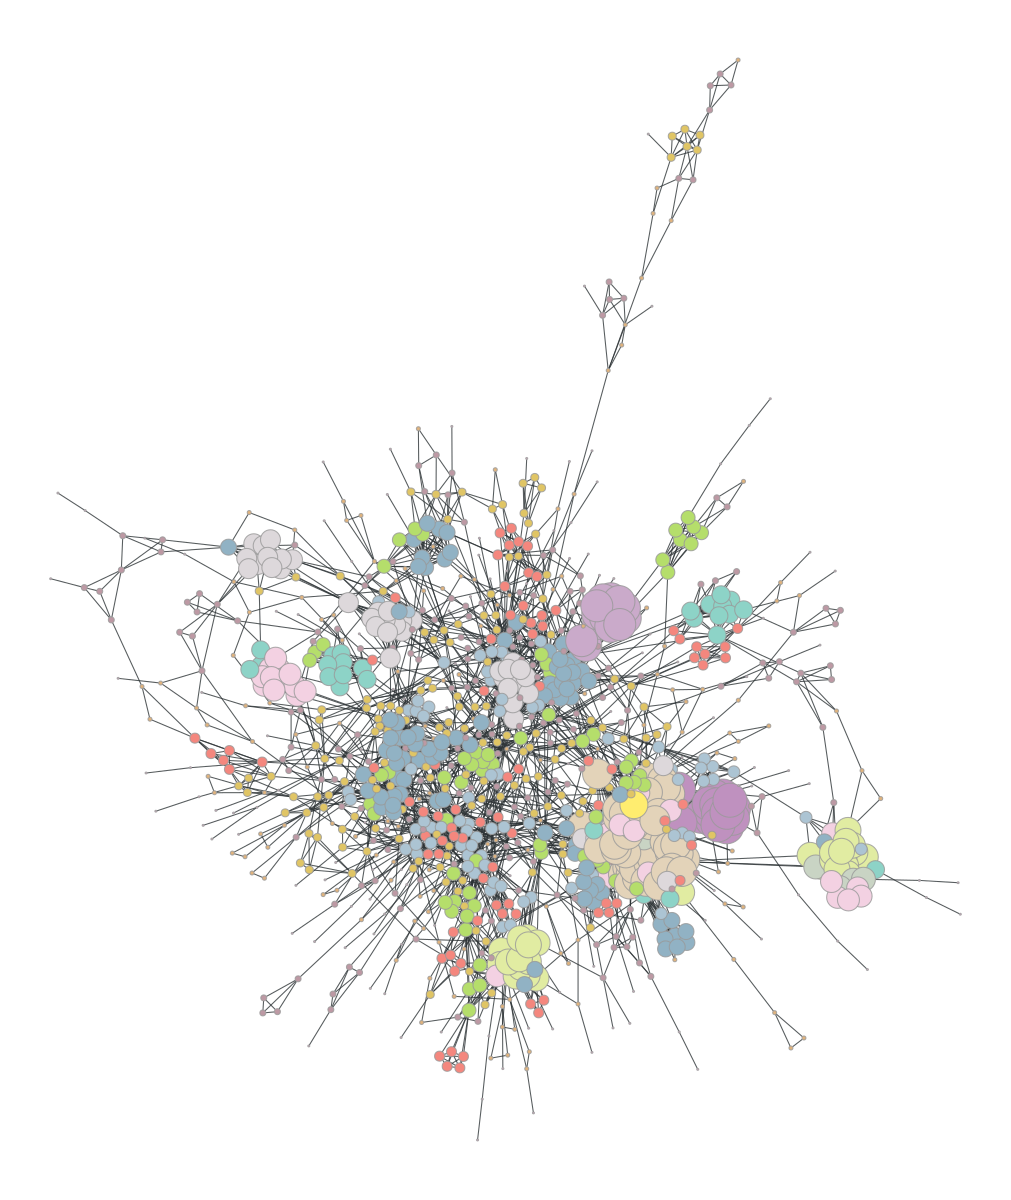

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fcafa063430, at 0x7fcb60cab5e0>

In [125]:
gt.graph_draw(cc, vertex_fill_color=kcore, vertex_size=kcore)